###Regressão linear bayesiana
Amostrar de uma função sinusoidal usando distribuição normal

In [5]:
import matplotlib.pyplot as plt                                                  
from pylab import *                                                              
import math  
import numpy as np

%matplotlib inline

def generate_sin_dist(n):                                                          
    x = np.random.uniform(0, 2*math.pi, n)                                                
    y = []                                                                       
    sigma = 0.2                                                                  
    for i in x:                                                                  
        mu = math.sin(i)                                                         
        s = np.random.normal(mu, sigma)                                          
        y.append(s)                                                              
    return x, np.array(y) 


###Fit bayesian


In [6]:
def fit_function_bayes(x, y, m, alpha, beta):  
    
    # Basis function    
    m += 1 # plus one for the non-optional first element of the bias vector ^0
    phi = np.array(range(m))
    Phi = np.zeros((np.size(x), m))

    for n, x_elem in enumerate(x):
        # create array filled with m copies of the nth datapoint
        x_ar = np.array([x_elem] * m)
        # multiply with the bias vector
        Phi[n] = x_ar ** phi

    basis_function = np.matrix(Phi)
    
    #Phi = create_phi(x, M)                                                    
    N = np.size(Phi, 1)                                                             
    In = np.eye(N, N)   
    
    aux_Sn = (beta * Phi.T.dot(Phi) + alpha * In)
    #print aux_Sn.shape
                                                                                 
    Sn = np.asmatrix(aux_Sn).I                                   
    mn = beta * Sn.dot(Phi.T).dot(y)                                             
                                                                                 
    return Sn, mn 

def predict_function_bayes(x, m, S, beta):                                     
    phi = []                                                                     
    for i in range(0,m.size):                                                    
        phi.append(x**i)                                                         
                                                                                 
    p_mean = np.dot(m,phi)                                                       
    p_var = beta**(-1) + np.matrix(phi).dot(S).dot(np.matrix(phi).T)                   
                                                                                 
    return p_mean, p_var 

###Predictive distribution

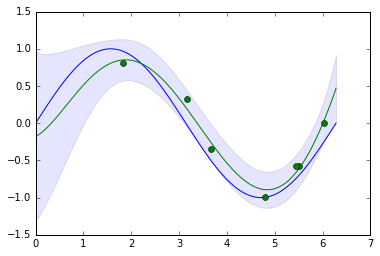

In [7]:
def plot_sin(linspace):                                             
    t = np.array([math.sin(i) for i in linspace])                                   
    plt.plot(linspace, t)                                                    
                                                                                 
def plot_function(linspace, w):                                                                                                          
    # for each x: sum for all m:  w[m]*x**m                                      
    f = [sum(w.item(p) * (x_point ** p) for p in range(np.size(w, 1))) for x_point in linspace]
                                                                                                                                                      
    plt.plot(linspace, f, color='g')  

def predictive_dist():                                                            
    N = 7                                                                        
    M = 5                                                                        
    alpha = 0.5                                                                  
    beta = 1/0.2**2                                                              
    res = 1000                                                                   
    X, y = generate_sin_dist(N)                                              
    Sn, mn = fit_function_bayes(X, y, M, alpha, beta)                          
                                                                                 
    ls = np.linspace(0, 2*math.pi, res)                                             
    plot_sin(ls)                                                                
    plot_function(ls, mn)                                                      
    plt.plot(X, y, 'o')                                                          
    upper = []                                                                   
    lower = []                                                                   
    for x in ls:                                                                 
        mean, var = predict_function_bayes(x, mn, Sn, beta)                    
        mean = float(mean)                                                       
        var = float(var)                                                         
        upper.append(mean + math.sqrt(var))                                           
        lower.append(mean - math.sqrt(var))                                           
                                                                                 
    plt.fill_between(ls, upper, lower, alpha=0.1)                                
    plt.show() 
    
predictive_dist()

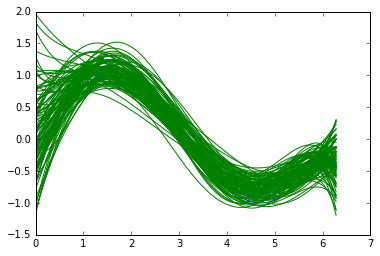

In [8]:
def plot_fit():                                                            
    N = 7                                                                        
    M = 5                                                                        
    alpha = 0.5                                                                  
    beta = 1/0.2**2                                                              
    res = 1000                                                                   
    X, y = generate_sin_dist(N)                                                    
    Sn, mn = fit_function_bayes(X, y, M, alpha, beta)                          
    ls = np.linspace(0, 2*math.pi, res)                                             
    plot_sin(ls)                                                                
    plot_function(ls, mn)                                                      
    plt.plot(X, y, 'o')                                                          
                                                                                 
    mn = [mn.item(i) for i in range(6)]                                          
    for i in range(100):                                                         
        mu = np.random.multivariate_normal(mn, Sn)                               
        mu = np.matrix(mu)                                                          
        plot_function(ls, mu)                                       
                                                                                 
    plt.show()  
    
plot_fit()